<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Analyzing Where Do People Drink?  </h1>
<h2>Description</h2>

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

You will need the following libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<b>1.0 Importing the Data</b>

Load the csv:

In [3]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:

In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.

In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:

In [6]:
df_group = df[['continent', 'wine_servings']].groupby(['continent'], as_index=False).sum()
display(df_group)

,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:

In [7]:
df_group = df[['continent', 'beer_servings']].groupby(['continent'], as_index=False).sum()
display(df_group)
display(df_group.describe())

,continent,beer_servings
0,Africa,3258
1,Asia,1630
2,Europe,8720
3,North America,3345
4,Oceania,1435
5,South America,2101


,beer_servings
count,6.000000
mean,3414.833333
std,2720.507116
min,1435.000000
25%,1747.750000
50%,2679.500000
75%,3323.250000
max,8720.000000


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

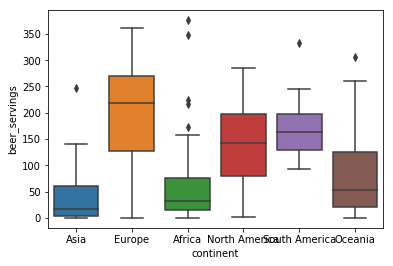

In [8]:
# import seaborn
import seaborn as sns 

# boxplot beer servings on each continent
sns.boxplot(x='continent', y='beer_servings', data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.

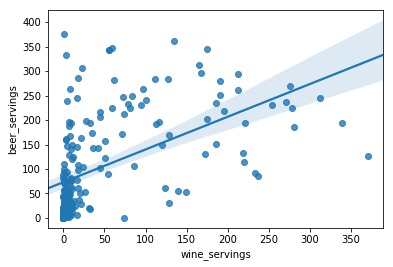

In [9]:
sns.regplot(x='wine_servings', y='beer_servings', data=df)

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [10]:
from sklearn.linear_model import LinearRegression
# Definex and y
x = df[['wine_servings']]
y = df[['total_litres_of_pure_alcohol']]

# Create object
lr = LinearRegression()

# Fit model
lr.fit(x, y)

# print R^2
print('R^2 score:',lr.score(x, y))

R^2 score: 0.4456875459787605


In [ ]:
from sklearn.linear_model import LinearRegression
# Definex and y
x = df[['wine_servings']]
y = df[['total_litres_of_pure_alcohol']]

# Create object and Fit model
lr = LinearRegression().fit(x, y)

# print R^2
print('R^2 score:',lr.score(x, y))

### Question 7
Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

In [19]:
# *** Prediction with all data (numerical and categorical variables) ***
from sklearn.model_selection import train_test_split

# get categorical features to numerical values
df2 = df._get_numeric_data()

# Get dummies of country and continent
df3 = pd.concat([df2, pd.get_dummies(df[['country']])], axis=1)
df4 = pd.concat([df3, pd.get_dummies(df[['continent']])], axis=1)

# delete total_litres_of_pure_alcohol form x_data
df_x = df4.drop("total_litres_of_pure_alcohol", axis=1)

# Create x and y
x = df_x
y = df4[['total_litres_of_pure_alcohol']]

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("Number of training samples:", x_train.shape[0])
print("Number of test samples :", x_test.shape[0])

# Create object
lr = LinearRegression()

# Fit model
lr.fit(x_train, y_train)

# print R^2 with test data
print('R^2 score:',lr.score(x_test, y_test))

Number of training samples: 154
Number of test samples : 39
R^2 score: 0.7507033476365842


<b>Question 8 :</b>

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
 
Input = [(('scale'), StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),
         ('model', LinearRegression())]

# Create Pipeline 
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)

# print R^2 with test data
print('R^2 score:', pipe.score(x_test, y_test))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


R^2 score: 0.017162609060114575


### Question 7 

In [22]:
# *** Prediction just with numerical data ***

# get categorical features to numerical values
df2 = df._get_numeric_data()

# delete total_litres_of_pure_alcohol form x_data
df_x = df2.drop("total_litres_of_pure_alcohol", axis=1)

# Create x and y
x = df_x
y = df2[['total_litres_of_pure_alcohol']]

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("Number of training samples:", x_train.shape[0])
print("Number of test samples :", x_test.shape[0])

# Create object
lr = LinearRegression()

# Fit model
lr.fit(x_train, y_train)

# print R^2 with test data
print('R^2 score:', lr.score(x_test, y_test))

Number of training samples: 154
Number of test samples : 39
R^2 score: 0.6993287521637523


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
 
# Create Input for pipe
Input = [(('scale'), StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),
         ('model', LinearRegression())]

# Create Pipeline 
pipe2 = Pipeline(Input)
pipe2.fit(x_train, y_train)

# print R^2 with test data
print('R^2 score:', pipe2.score(x_test, y_test))

R^2 score: 0.7305342892823594


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$

In [24]:
from sklearn.linear_model import Ridge

# Create object
RigeModel = Ridge(alpha=0.1)

# Fit model
RigeModel.fit(x_train, y_train)

# Predict values
yhat = RigeModel.predict(x_test)

# print R^2 with test data
print('R^2 score:', RigeModel.score(x_test, y_test))

R^2 score: 0.6993287665057231


<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 

In [25]:
# Create polynomial transform
pr = PolynomialFeatures(degree=2)
pr.fit(x_train, y_train)

yhat_pr = pr.predict(x_test)

# print R^2 with test data
print('R^2 score of PolynomialFeatures:', pr.score(yhat_pr, y_test))

R^2 score: 0.7305343073360482


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook

<b>Sources</b>

<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.